https://colab.research.google.com/drive/1WBR7qM25aALaByscI0oDr2q4zw3IDusp#scrollTo=Z5F-AG2cTuWH

In [7]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [79]:
def read_pgm_matrix(file_path):
    with open(file_path, 'rb') as f:
        # Reading the header
        magic_number = f.readline().strip()
        if magic_number not in [b'P2', b'P5']:
            raise ValueError("Unsupported PGM format!")

        # Skiping the comments(may be multiple lines)
        while True:
            line = f.readline()
            if line.startswith(b'#'):
                continue
            else:
                # Read image dimensions
                width, height = map(int, line.split())
                break

        # ignore the maximum gray value
        max_gray = int(f.readline().strip())

        # Read pixel data
        if magic_number == b'P2':  # ASCII format
            pixels = []
            for line in f:
                pixels.extend(map(int, line.split()))
        elif magic_number == b'P5':  # Binary format
            pixels = np.frombuffer(f.read(), dtype=np.uint8)

        # Reshape into a 2D array (matrix)
        matrix = np.array(pixels).reshape((height, width))
        return matrix

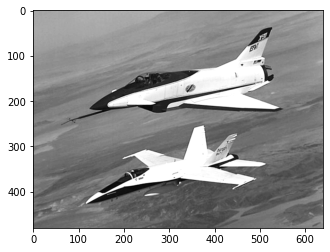

In [80]:
image = read_pgm_matrix("images/x31_f18.ascii.pgm")
plt.imshow(image, cmap='gray') # using cv2 just to display the image

In [61]:
# image = cv2.imread("images/Apple_gray.jpeg",cv2.IMREAD_GRAYSCALE)
# print(image)

<Axes: ylabel='Count'>

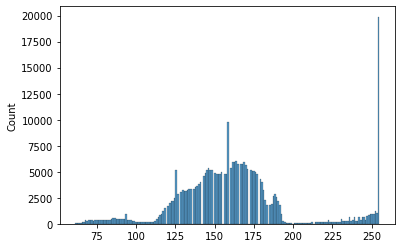

In [81]:
sns.histplot(image.flatten())
# plt.ylim(0, 5000)

In [65]:
row, col = image.shape
dic = {}
for i in range(row):
    for j in range(col):
        if(image[i][j] not in dic):
            dic[image[i][j]] = 1
        else:
            dic[image[i][j]] += 1
dic = dict(sorted(dic.items(), key=lambda x: x[0]))
print(dic)

{61: 19, 62: 45, 63: 76, 64: 91, 65: 108, 66: 125, 67: 176, 68: 405, 69: 315, 70: 348, 71: 321, 72: 327, 73: 312, 74: 394, 75: 395, 76: 384, 77: 405, 78: 355, 79: 360, 80: 337, 81: 335, 82: 354, 83: 357, 84: 430, 85: 527, 86: 538, 87: 509, 88: 478, 89: 451, 90: 470, 91: 428, 92: 433, 93: 437, 94: 483, 95: 390, 96: 331, 97: 322, 98: 259, 99: 255, 100: 207, 101: 192, 102: 159, 103: 155, 104: 150, 105: 135, 106: 130, 107: 138, 108: 159, 109: 172, 110: 189, 111: 209, 112: 306, 113: 426, 114: 614, 115: 840, 116: 936, 117: 1248, 118: 1537, 120: 1738, 121: 1990, 122: 2200, 123: 2227, 124: 2459, 125: 2494, 126: 2653, 127: 2823, 129: 3084, 130: 3262, 131: 3197, 132: 3196, 133: 3234, 134: 3310, 135: 3388, 137: 3352, 138: 3501, 139: 3645, 140: 3803, 141: 4010, 143: 4544, 144: 4883, 145: 5145, 146: 5392, 147: 5184, 148: 5141, 150: 4889, 151: 4764, 152: 4791, 153: 4812, 154: 5007, 156: 4783, 157: 4740, 158: 4797, 159: 4960, 161: 5338, 162: 5971, 163: 5921, 164: 6017, 165: 5744, 167: 5728, 168: 5727

In [66]:
for key in dic:
    dic[key] = dic[key]/(row*col)
print(dic)

{61: 6.184895833333334e-05, 62: 0.000146484375, 63: 0.00024739583333333335, 64: 0.00029622395833333334, 65: 0.0003515625, 66: 0.0004069010416666667, 67: 0.0005729166666666667, 68: 0.001318359375, 69: 0.001025390625, 70: 0.0011328125, 71: 0.001044921875, 72: 0.001064453125, 73: 0.001015625, 74: 0.0012825520833333332, 75: 0.0012858072916666667, 76: 0.00125, 77: 0.001318359375, 78: 0.0011555989583333333, 79: 0.001171875, 80: 0.0010970052083333333, 81: 0.0010904947916666667, 82: 0.00115234375, 83: 0.001162109375, 84: 0.0013997395833333333, 85: 0.0017154947916666666, 86: 0.0017513020833333332, 87: 0.0016569010416666668, 88: 0.0015559895833333333, 89: 0.0014680989583333334, 90: 0.0015299479166666667, 91: 0.0013932291666666667, 92: 0.0014095052083333334, 93: 0.0014225260416666668, 94: 0.001572265625, 95: 0.00126953125, 96: 0.0010774739583333333, 97: 0.0010481770833333333, 98: 0.0008430989583333333, 99: 0.000830078125, 100: 0.000673828125, 101: 0.000625, 102: 0.000517578125, 103: 0.00050455729

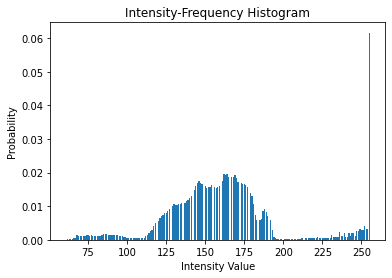

In [67]:
# Extract keys (intensity values) and values (frequencies)
x = list(dic.keys())
y = list(dic.values())
plt.bar(x,y)
plt.xlabel("Intensity Value")
plt.ylabel("Probability")
plt.title("Intensity-Frequency Histogram")
plt.show()

In [68]:
cdf_dic = {}
for i in range(len(x)):
    sk = (sum(y[:i+1]))*255
    cdf_dic.update({x[i]: round(sk)})

print(cdf_dic)

{61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 1, 68: 1, 69: 1, 70: 1, 71: 2, 72: 2, 73: 2, 74: 3, 75: 3, 76: 3, 77: 4, 78: 4, 79: 4, 80: 4, 81: 5, 82: 5, 83: 5, 84: 6, 85: 6, 86: 7, 87: 7, 88: 7, 89: 8, 90: 8, 91: 8, 92: 9, 93: 9, 94: 10, 95: 10, 96: 10, 97: 10, 98: 11, 99: 11, 100: 11, 101: 11, 102: 11, 103: 11, 104: 12, 105: 12, 106: 12, 107: 12, 108: 12, 109: 12, 110: 12, 111: 13, 112: 13, 113: 13, 114: 14, 115: 14, 116: 15, 117: 16, 118: 17, 120: 19, 121: 21, 122: 22, 123: 24, 124: 26, 125: 28, 126: 31, 127: 33, 129: 35, 130: 38, 131: 41, 132: 43, 133: 46, 134: 49, 135: 52, 137: 54, 138: 57, 139: 60, 140: 64, 141: 67, 143: 71, 144: 75, 145: 79, 146: 83, 147: 88, 148: 92, 150: 96, 151: 100, 152: 104, 153: 108, 154: 112, 156: 116, 157: 120, 158: 124, 159: 128, 161: 133, 162: 138, 163: 142, 164: 147, 165: 152, 167: 157, 168: 162, 169: 167, 170: 171, 171: 176, 173: 180, 174: 184, 175: 189, 176: 193, 177: 197, 179: 200, 180: 204, 181: 206, 182: 208, 183: 210, 185: 211, 186: 213, 187: 2

[]

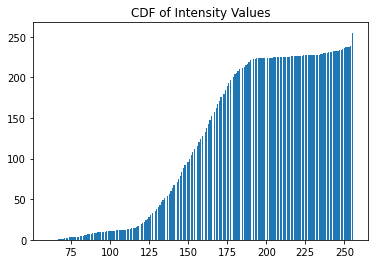

In [69]:
plt.bar(list(cdf_dic.keys()), list(cdf_dic.values()))
plt.title("CDF of Intensity Values")
plt.plot()

<h3>Count CDF values and consequtive probability</h3>

In [70]:
labll_hist = {}
for key in cdf_dic:
    val = cdf_dic[key]
    if val not in labll_hist:
        labll_hist[val] = dic[key]
    else:
        labll_hist[val] += dic[key]
print(labll_hist)

{0: 0.0015104166666666666, 1: 0.0040494791666666665, 2: 0.003125, 3: 0.003818359375, 4: 0.0047428385416666665, 5: 0.003404947916666667, 6: 0.003115234375, 7: 0.004964192708333334, 8: 0.004391276041666667, 9: 0.0028320312500000003, 10: 0.004967447916666667, 11: 0.003994140625, 12: 0.0034928385416666662, 13: 0.0030631510416666667, 14: 0.004733072916666667, 15: 0.003046875, 16: 0.0040625, 17: 0.005003255208333333, 19: 0.005657552083333333, 21: 0.006477864583333334, 22: 0.007161458333333333, 24: 0.007249348958333333, 26: 0.008004557291666667, 28: 0.008118489583333333, 31: 0.008636067708333334, 33: 0.009189453125, 35: 0.0100390625, 38: 0.010618489583333333, 41: 0.010406901041666666, 43: 0.010403645833333334, 46: 0.01052734375, 49: 0.010774739583333333, 52: 0.011028645833333333, 54: 0.010911458333333334, 57: 0.011396484375, 60: 0.011865234375, 64: 0.012379557291666666, 67: 0.013053385416666667, 71: 0.014791666666666667, 75: 0.015895182291666667, 79: 0.016748046875, 83: 0.017552083333333333, 

There are some intersity levels missing so, for those intensity levels averaging prev and next level's intensity. 

In [71]:
# for i in range(256):
#     if i not in labll_hist:
#         labll_hist[i] = labll_hist[i-1]

[]

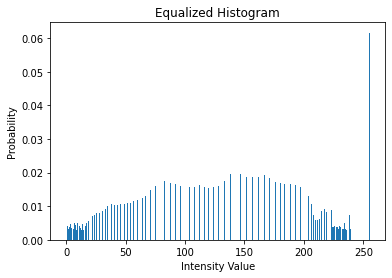

In [72]:
x = list(labll_hist.keys())
y = list(labll_hist.values())
plt.bar(x,y)
plt.xlabel("Intensity Value")
plt.ylabel("Probability")
plt.title("Equalized Histogram")
plt.plot()

In [73]:
mat = [[0]*col for _ in range(row)]
for i in range(row):
    for j in range(col):
        mat[i][j] = cdf_dic[image[i][j]]

mat = np.array(mat)

In [74]:
# Convert both images to uint8 (if not already)
image = image.astype(np.uint8)
mat = mat.astype(np.uint8)
cv2.imshow("Equalized Image", mat)
cv2.waitKey(0)

-1

In [75]:
new_img = np.hstack([image, mat])
cv2.imshow("comparison", new_img)
cv2.waitKey(0)

-1